Импортируем все, что нам нужно:

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Загружаем датасет и разделяем на обучающую и тестовую выборки:

In [41]:
data = pd.read_csv('diabetes.csv')  # считываем данные из csv файла
data                                # проверяем, что все считано нормально

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
x = data.drop(['Outcome'], axis=1)    # в качестве данных берем все, кроме столбца Outcome
y = data['Outcome']                   # столбец Outcome - ключевой
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)  # разделяем на тестовую и тренировочную выборки

Обучим логистическую регрессию и решающее дерево и оценим их качество по метрикам Accuracy, Precision, Recall и F1:

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_score(clf, model_name):
	print(model_name)                                                 # выводим навзание модели
	clf.fit(x_train, y_train)                                         # обучаем модель на тренировочной выборке
	y_pred_train = clf.predict(x_train)                               # просим предсказать значения для тренировочной выборки
	y_pred_test = clf.predict(x_test)                                 # просим предсказать значения для тестовой выборки
	print('На тренировочной выборке:')                                ##
	print('Accuracy: ', accuracy_score(y_train, y_pred_train))        ###
	print('Precision: ', precision_score(y_train, y_pred_train))      #### выводим метрики для тренировочной выбокри
	print('Recall: ', recall_score(y_train, y_pred_train))            ###
	print('F1: ', f1_score(y_train, y_pred_train))                    ##
	print('На тестовой выборке:')                                     ##
	print('Accuracy: ', accuracy_score(y_test, y_pred_test))          ###
	print('Precision: ', precision_score(y_test, y_pred_test))        #### выводим метрики для тестовой выборки
	print('Recall: ', recall_score(y_test, y_pred_test))              ###
	print('F1: ', f1_score(y_test, y_pred_test))                      ##

train_and_score(LogisticRegression(random_state=0, max_iter=200), 'Логистическая регрессия\n')  # используем для логистической регрессии
train_and_score(DecisionTreeClassifier(random_state=0), '\nРешающее дерево\n')                  # используем для решающего дерева

Логистическая регрессия

На тренировочной выборке:
Accuracy:  0.7728119180633147
Precision:  0.7181208053691275
Recall:  0.5721925133689839
F1:  0.6369047619047619
На тестовой выборке:
Accuracy:  0.7835497835497836
Precision:  0.7384615384615385
Recall:  0.5925925925925926
F1:  0.6575342465753424

Решающее дерево

На тренировочной выборке:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
На тестовой выборке:
Accuracy:  0.6926406926406926
Precision:  0.5657894736842105
Recall:  0.5308641975308642
F1:  0.5477707006369427


Т.к. решающее дерево с параметрами по умолчанию, то оно сильно перебучилось. Таким образом у нас получилось, что лучше обобщает датасет модель логистической регресии. Но стоит попробовать подобрать гиперпараметры решающего дерева, чтобы оно не переобучалось. И, возможно, тогда нам удастся получить качество лучше чем у линейной модели.
Рассмотрим количество положительных и отрицательных наблюдений в датасете:

In [44]:
y.value_counts()   # считаем количество 0 и 1 в y

Outcome
0    500
1    268
Name: count, dtype: int64

Видим, что классы у нас не сбалансированы, поэтому в дальнейшем для оценки качества моделей лучше всего подойдет F1.
Сначала попробуем ограничить глубину решающего дерева (гиперпараметр max_depth): 

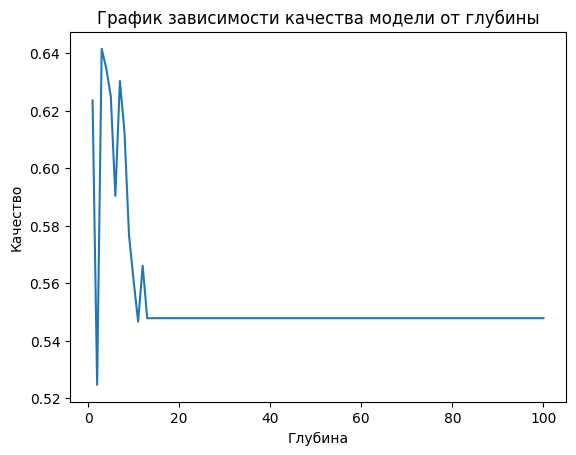

In [45]:
import matplotlib.pyplot as plt
f1s = []                          # метрики F1
depths = list(range(1, 101, 1))   # возможные значения глубины
best_depth = -1                   # значение лучшей глубины дерева
best_f1 = 0                       # значение лучшей метрики F1
for max_depth in depths:          # ищем лучшее значение глубины дерева (т.е. где F1 наибольшее)
	clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)     
	clf.fit(x_train, y_train)                                             
	y_pred = clf.predict(x_test)                                          
	f1 = f1_score(y_test, y_pred)                                         
	f1s.append(f1)                                                        
	if f1 > best_f1:
		best_f1 = f1
		best_depth = max_depth

plt.plot(depths, f1s)     # изображаем график
plt.xlabel('Глубина')     # меняем название оси OX
plt.ylabel('Качество')    # меняем название оси OY
plt.title('График зависимости качества модели от глубины')  # меняем заголовок графика
plt.show()   # показываем график

Лучшая модель получилась при глубине:

In [46]:
print('Глубина: ', best_depth, 'F1: ', best_f1)  # выводим значение лучшей глубины и значение F1 для этой глубины

Глубина:  3 F1:  0.6415094339622641


Таким образом мы уже получили модель с сильно лучшим качеством, по сравнению с логистической регрессией.
Построим получившееся лучшее дерево:

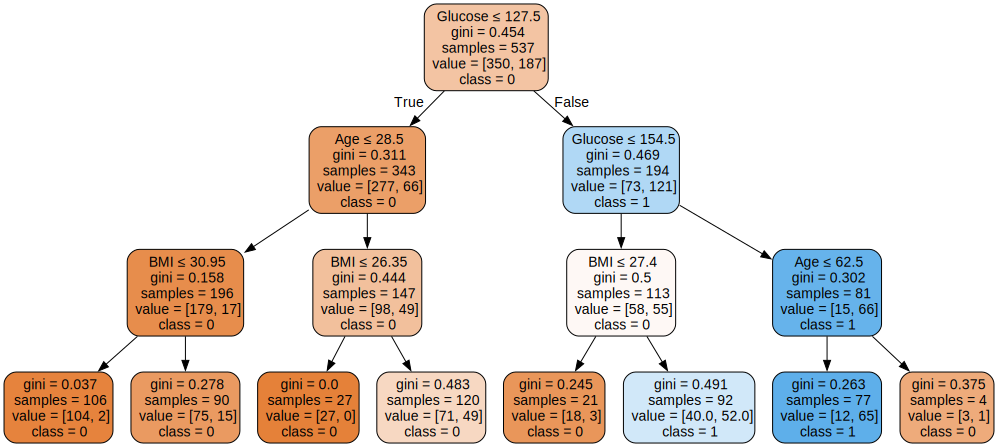

In [47]:
import graphviz
from sklearn import tree

best_tree = DecisionTreeClassifier(max_depth=best_depth)                                                        # решающее дерево с лучшей глубиной
best_tree.fit(x_train, y_train)                                                                                 # обучаем данную модель
dot_data = tree.export_graphviz(best_tree, out_file=None, feature_names=data.columns[:-1],                      # получаем данные для решающего дерева, для того чтобы изобразить его
								class_names=['0', '1'], filled=True, rounded=True, special_characters=True)     #
graph = graphviz.Source(dot_data) # строим изображения по полученным данным
graph # изображаем график

Построим диаграмму значимости признаков датасета:

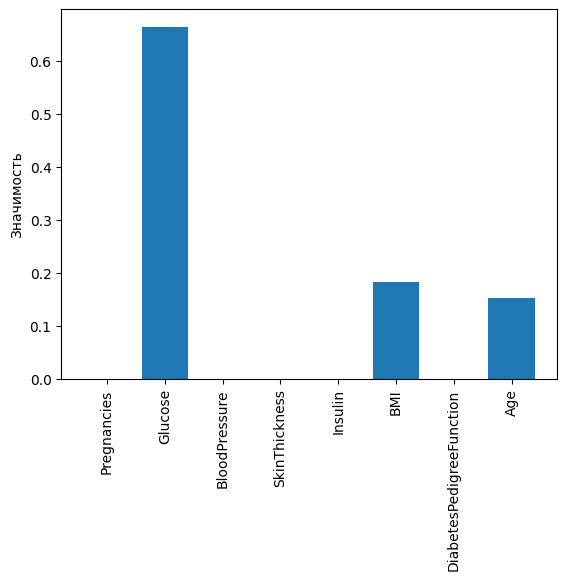

In [ ]:
plt.bar(data.columns[:-1], best_tree.feature_importances_)   # изображаем 
plt.ylabel('Значимость')                                     # меняем название оси OY
plt.tick_params(axis='x', rotation=90)                       # поворачиваем подписи каждого столбца, чтобы они помещались полностью

Теперь построим PR и ROC кривые:

Text(0.5, 1.0, 'PR кривая')

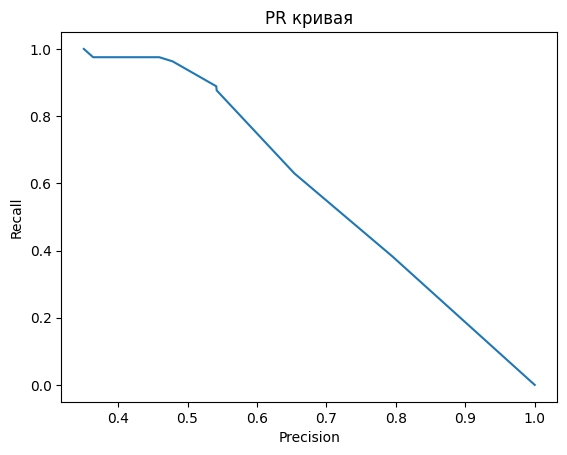

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve
y_pred_probs = best_tree.predict_proba(x_test)[:, 1]                   # просим предсказать вероятности значений y
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)    # ищем значения precision и recall 
plt.plot(precision, recall)                                            # строим график
plt.xlabel('Precision')                                                # меняем название оси OX
plt.ylabel('Recall')                                                   # меняем название оси OY
plt.title('PR кривая')                                                 # меняем заголовок

Text(0.5, 1.0, 'ROC кривая')

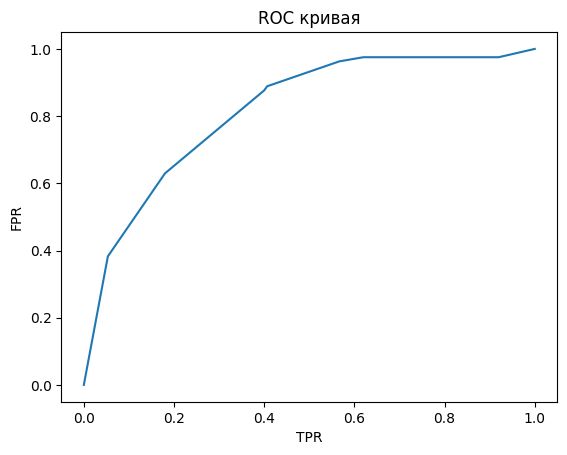

In [ ]:
TPR, FPR, _ = roc_curve(y_test, y_pred_probs)    # ищем значения TPR, FPR
plt.plot(TPR, FPR)                               # строим график
plt.xlabel('TPR')                                # меняем название оси OX 
plt.ylabel('FPR')                                # меняем название оси OY
plt.title('ROC кривая')                          # меняем заголовок графика

Исследуем качество модели в зависимости от максимального количества признаков max_features:

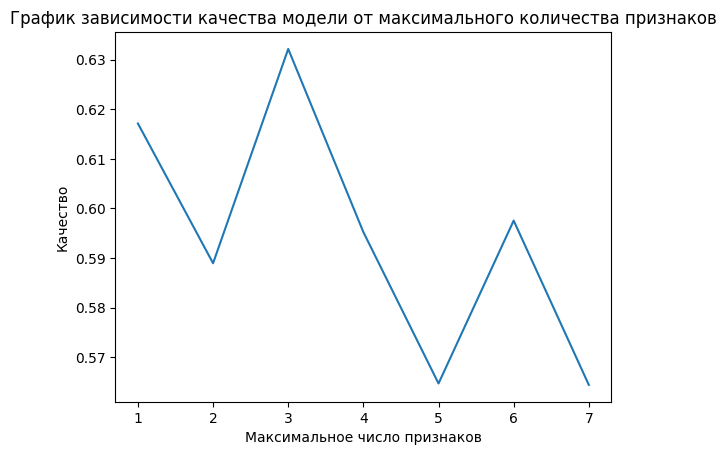

In [ ]:
f1s = []                                 # метрики F1
features = list(range(1, x.shape[1]))    # возможные значения количества признаков
for max_features in features:   # ищем значения метрик F1 для каждого количества признаков
	clf = DecisionTreeClassifier(max_features=max_features, random_state=0)
	clf.fit(x_train, y_train)
	y_pred = clf.predict(x_test)
	f1s.append(f1_score(y_test, y_pred))
plt.plot(features, f1s)                                                                        # строим график
plt.xlabel('Максимальное число признаков')                                                     # меняем название оси OX
plt.ylabel('Качество')                                                                         # меняем название оси OY
plt.title('График зависимости качества модели от максимального количества признаков')          # меняем заголовок графика
plt.show()                                                                                     # показываем график

Теперь от минимального числа обьектов в листьях min_samples_split:

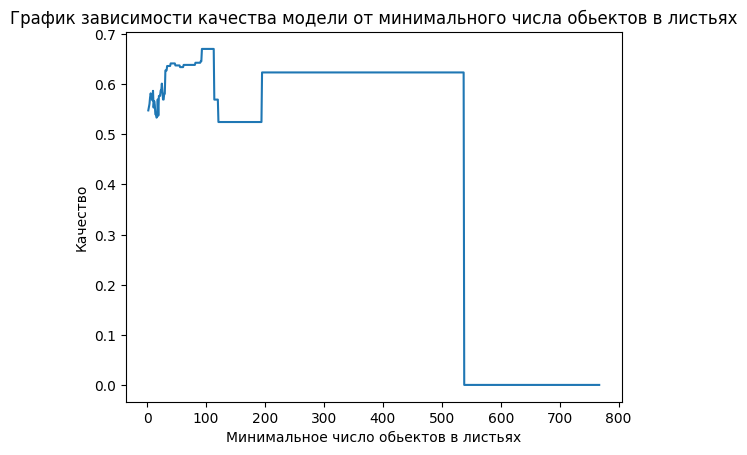

In [ ]:
f1s = []                                           # метрики F1
features = list(range(2, x.shape[0]))              # возможные значения числа обьектов в листьях
for min_samples_split in features:       # ищем значение метрик F1 для каждого количества обьектов в листьях
	clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
	clf.fit(x_train, y_train)
	y_pred = clf.predict(x_test)
	f1s.append(f1_score(y_test, y_pred))
plt.plot(features, f1s)                                                                      # строим график
plt.xlabel('Минимальное число обьектов в листьях')                                           # меняем название оси OX
plt.ylabel('Качество')                                                                       # меняем название оси OY
plt.title('График зависимости качества модели от минимального числа обьектов в листьях')     # меняем заголовок графика
plt.show()                                                                                   # показываем график